# Environment

In [18]:
import gym
env = gym.make("FrozenLake8x8-v0").env
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


## TODO 
Explain the reset, step method and their returns
Check state

Check the effect of each action using the step method:  
* 0: &darr; (south)
* 1: &uarr; (north)
* 2: &rarr; (east)
* 3: &larr; (west)
* 4: pickup
* 5: dropoff

In [19]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(4)
State Space Discrete(64)


the 500 states correspond to a encoding of the taxi's location, the passenger's location, and the destination location.

In [20]:
env.step(1)
env.render()

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


# Random agent

In [21]:
frames = [] # for animation

done = False

timesteps = 0
while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'reward': reward
        }
    )

    timesteps += 1
     
print("Timesteps taken: {}".format(timesteps))


Timesteps taken: 73


In [22]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Reward: {frame['reward']}")
        sleep(.2)
        
print_frames(frames)


  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

Timestep: 73
State: 42
Reward: 0.0


# RL

In [24]:
np.linspace(1, 0.1, nb_episodes)

array([1.      , 0.999991, 0.999982, ..., 0.100018, 0.100009, 0.1     ])

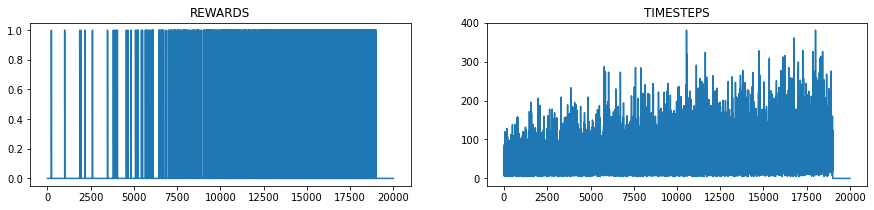

Episode: 19000
Training finished.



In [29]:
import random
import matplotlib.pyplot as plt
import numpy as np

nb_episodes = 20000
alpha = 0.1
gamma = 0.99
epsilon = np.linspace(1, 0.1, nb_episodes)



q_table = np.zeros([env.observation_space.n, env.action_space.n])
training_stats={'timesteps':np.zeros(nb_episodes), 
                'rewards': np.zeros(nb_episodes)}
for i in range(nb_episodes):
    state = env.reset()
    timesteps, total_rewards, = 0, 0
    while True:
        if random.uniform(0, 1) < epsilon[i]:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        training_stats['rewards'][i] += reward
        training_stats['timesteps'][i] += 1
        state = next_state
        
        if done:
            break
        
     
        
    if i % 1000 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(15,3))
        plt.subplot(1,2,1)
        plt.plot(training_stats['rewards'])
        plt.title("REWARDS")
        plt.subplot(1,2,2)
        plt.plot(training_stats['timesteps'])
        plt.title("TIMESTEPS")
        plt.show()
        print(f"Episode: {i}")

print("Training finished.\n")


In [30]:
env.reset()
frames = [] # for animation
timesteps = 0
while True:
    action = np.argmax(q_table[state])
    state, reward, done, info = env.step(action)
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'reward': reward
        }
    )

    timesteps += 1
    if done:
        break
        
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 15
State: 0
Reward: 20


In [38]:
# Parameters tunning with optuna